Loading data from: /Users/eliemenassa/Desktop/Projet/payments_fx_pipeline/data/raw/fx_rates_market.csv


,date,currency_pair,market_rate
0,2024-01-01,EURUSD,1.0811
1,2024-01-02,EURUSD,1.0808
2,2024-01-03,EURUSD,1.0822
3,2024-01-04,EURUSD,1.0855
4,2024-01-05,EURUSD,1.0850


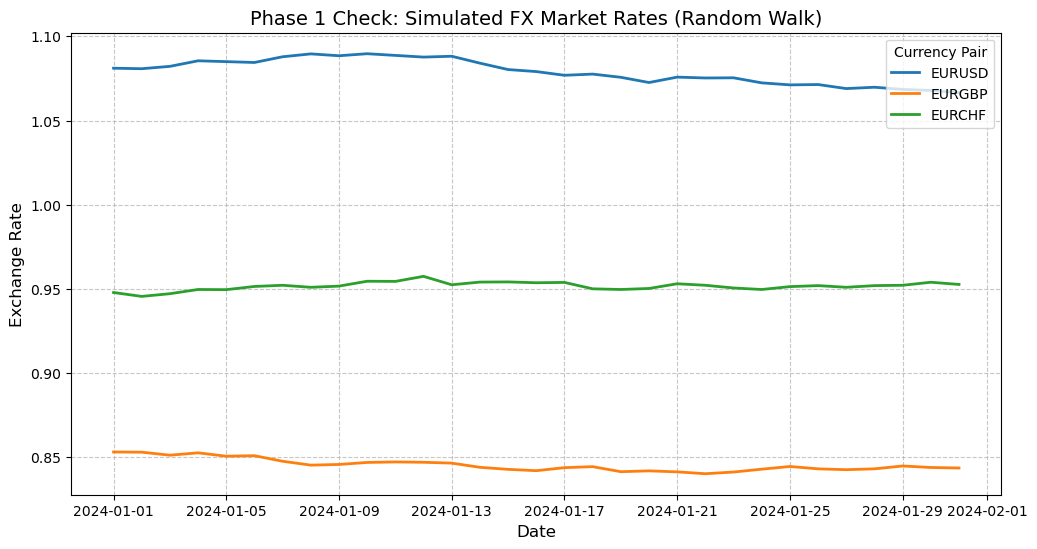

In [3]:
"""

 MARKET DATA EXPLORATION NOTEBOOK

-----------------------------------

This notebook is used to visually inspect the synthetic market data 

generated in Phase 1. We want to confirm that the FX rates follow 

a realistic "Random Walk" pattern.

"""



import pandas as pd

import matplotlib.pyplot as plt

import sys

from pathlib import Path



# --------------------------------------------------------------------------

# 1. SETUP PATHS

# --------------------------------------------------------------------------

# Since this notebook is in the 'notebooks/' folder, we need to add the 

# 'src/' folder to Python's path to import our 'config.py' file.

current_dir = Path.cwd()

src_path = current_dir.parent / "src"



if str(src_path) not in sys.path:

    sys.path.append(str(src_path))



import config



# --------------------------------------------------------------------------

# 2. LOAD DATA

# --------------------------------------------------------------------------

print(f"Loading data from: {config.FILE_MARKET_RATES}")

df_rates = pd.read_csv(config.FILE_MARKET_RATES)



# Convert date string to datetime objects for proper plotting

df_rates["date"] = pd.to_datetime(df_rates["date"])



# Show first few rows to verify structure

display(df_rates.head())



# --------------------------------------------------------------------------

# 3. VISUALIZATION (Matplotlib)

# --------------------------------------------------------------------------

# Create a figure with a decent size

plt.figure(figsize=(12, 6))



# Loop through each currency pair (EURUSD, EURGBP...) and plot a line

for pair in df_rates["currency_pair"].unique():

    subset = df_rates[df_rates["currency_pair"] == pair]

    plt.plot(subset["date"], subset["market_rate"], label=pair, linewidth=2)



# Customize the chart (Titles, Labels, Grid)

plt.title("Phase 1 Check: Simulated FX Market Rates (Random Walk)", fontsize=14)

plt.xlabel("Date", fontsize=12)

plt.ylabel("Exchange Rate", fontsize=12)

plt.legend(title="Currency Pair")

plt.grid(True, linestyle="--", alpha=0.7)



# Show the plot

plt.show()